# Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset

In [2]:
# Load the dataset
url = './my_data/Salary_dataset.csv'  # Update with your file path
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()

Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0

# Perform eda
1. basic information and description

In [4]:
# Perform data analysis
print("Dataset Information:")
print(data.info())

print("\nDataset Description:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes
None

Dataset Description:
       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000         4.800000   65238.000000
75%     21.750000         7.800000  100545.750000
max     29.000000        10.600000  122392.000000

Missing Values:
Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


2. Visualization


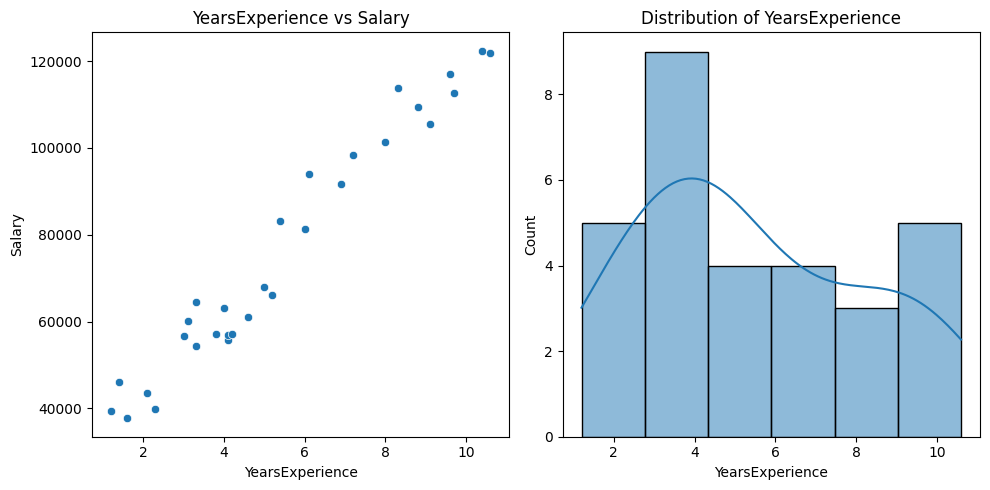

In [5]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='YearsExperience', y='Salary', data=data)
plt.title('YearsExperience vs Salary')

plt.subplot(1, 2, 2)
sns.histplot(data['YearsExperience'], kde=True)
plt.title('Distribution of YearsExperience')

plt.tight_layout()
plt.show()


# Data preprocessing
Not needed, simple dataset with no missing values

# Building model (regression)

In [6]:
# Define features and target variable
X = data[['YearsExperience']]
y = data['Salary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Making and evaluating predictions

In [7]:
# Make predictions
y_pred = model.predict(X_test)
# Eval the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Model Evaluation:
Mean Squared Error: 49830096.855908394
R-squared: 0.9024461774180497


# Result visualization


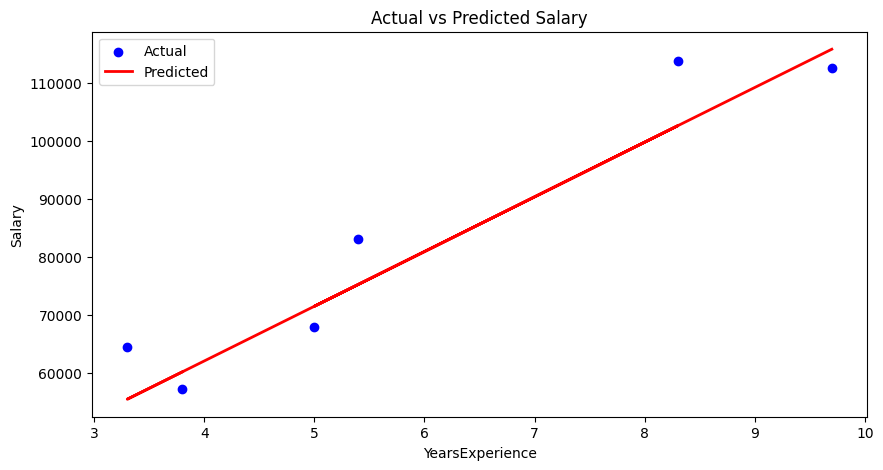

In [8]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()
